In [1]:
# Primary author: Johannes (a.k.a. James) P. Johnson-Martinez
# DOI: https://doi.org/10.1101/2023.03.04.531100
# Title: metabobolomics_eGFR
# Input(s): Arivale data snapshots
# Output(s): Statistical graphs and conclusions, diet.csv and mediation.csv
# Comments: This is the primary notebook that obtains the several different data snapshots, 
# transforms and arranges the data, and outputs the .csv files that are inputted into
# the R markdown files (.rmd) to compute final graphs and statistics

# Initial steps:

# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
#import tensorflow as tf

# Get the library
from arivale_data_interface import *
import arivale_data_interface as adi

# Set display options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
from IPython.display import display

# Apply these settings so the library knows where the data is
adi.apply_isb_config()

# If you want plots to show up in the notebook you need to run this
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]

In [2]:
#list the local snapshots
local_snapshots = adi.list_local_snapshots()
with pd.option_context('display.max_colwidth', 100):
    display(local_snapshots)
adi.list_snapshot_contents(path = local_snapshots.loc[0])

0     /proj/arivale/snapshots/arivale_snapshot_ISB_2020-03-16_2156
1     /proj/arivale/snapshots/arivale_snapshot_ISB_2020-01-24_0127
2     /proj/arivale/snapshots/arivale_snapshot_ISB_2019-11-29_2258
3     /proj/arivale/snapshots/arivale_snapshot_ISB_2019-11-22_2258
4     /proj/arivale/snapshots/arivale_snapshot_ISB_2019-10-14_0054
5     /proj/arivale/snapshots/arivale_snapshot_ISB_2019-05-31_2326
6     /proj/arivale/snapshots/arivale_snapshot_ISB_2019-05-19_1330
7     /proj/arivale/snapshots/arivale_snapshot_ISB_2019-05-12_1330
8     /proj/arivale/snapshots/arivale_snapshot_ISB_2019-05-10_0053
9     /proj/arivale/snapshots/arivale_snapshot_ISB_2019-05-05_1330
10    /proj/arivale/snapshots/arivale_snapshot_ISB_2019-04-28_1330
11    /proj/arivale/snapshots/arivale_snapshot_ISB_2019-04-21_1330
12    /proj/arivale/snapshots/arivale_snapshot_ISB_2019-04-14_1330
13    /proj/arivale/snapshots/arivale_snapshot_ISB_2019-03-31_1330
14    /proj/arivale/snapshots/arivale_snapshot_ISB_2019-03-29_

,basename,dirname,size,isdir,mode,mtime
0,proteomics_metadata.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,248162,False,33184,2020-03-16 21:59:20.000000000
1,microbiome_dashboard.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,1389505,False,33184,2020-03-16 21:58:32.000000000
2,assessments_exercise_readiness.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,552055,False,33184,2020-03-16 21:57:17.000000000
3,assessments_health_history_old.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,30775811,False,33184,2020-03-16 21:57:15.000000000
4,analyte_ranges.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,612873,False,33184,2020-03-16 21:57:01.000000000
5,wearables_raw_monthly.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,27708310,False,33184,2020-03-16 22:00:26.000000000
6,metabolomics_corrected.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,60169491,False,33184,2020-03-16 21:59:26.000000000
7,assessments.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,182233974,False,33184,2020-03-16 21:57:09.000000000
8,microbiome_trimmed_diversity.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,1657995,False,33184,2020-03-16 21:59:11.000000000
9,assessments_lifestyle.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,3794590,False,33184,2020-03-16 21:57:17.000000000


In [3]:
# Define and obtain the criteria for excluding those that aren't "generally healthy"
laxmed = adi.get_snapshot('assessments')
laxmed = laxmed[['public_client_id','days_in_program','assessment:digestion:laxatives:enum']]
cholmed = adi.get_snapshot('assessments_medications')
cholmed = cholmed[['public_client_id','days_in_program','meds_cholesterol','meds_blood_pressure']]
laxmed = laxmed.rename(columns={'assessment:digestion:laxatives:enum':'meds_laxatives'})
meds = pd.merge(laxmed,cholmed)
meds

#remove those who report (Yes) below from the regression cohort.
hh = adi.get_snapshot('assessments_health_history_new')
dig = adi.get_snapshot('assessments_digestive_health')


#Retrieve miscellaneous digestive health indicators: 
lifestyle = adi.get_snapshot('assessments') 
lifestyle = lifestyle.drop_duplicates(subset='public_client_id')
lifestyle = lifestyle.sort_values('days_in_program',ascending=True)

#diabetes = hh[['public_client_id','assessment:health-history:diabetes_adult:self_current']]

meds = meds[['public_client_id','meds_laxatives','meds_cholesterol','meds_blood_pressure']]

digest = pd.merge(hh,dig, on = list(['vendor','days_in_program','days_since_first_call','days_since_first_draw','month','weekday','season',"public_client_id"]))
digest = pd.merge(digest, meds, on = "public_client_id")

common_columns = list(set(digest.columns).intersection(lifestyle.columns))
digest = pd.merge(digest, lifestyle, on=common_columns)

# create a list of values to check
values = ['Yes', 'Y', 'True','TRUE',True, 1
          ,'(3) Once per week or less', '(1) Daily','(2) Several times per week', '(2) Currently'
         ]

substrings_to_detect = ['public_client_id','meds_blood_pressure','drugs_cholesterol', 'meds_cholesterol','meds_laxatives', 'ulcerative_colitis', 'kidney_disease','bladder_kidney','kidney_cancer','kidney_failure','celiac_disease','colonic_crohns','ileal_crohns','diverticulosis','inflammatory_bowel','irritable_bowel','gerd','peptic_ulcer','coagulation']
substrings_to_exclude = ['siblings','sister','mother','family','father','paternal','maternal','grandparent','self_past','gt1ya']
inclusion_mask = digest.columns.str.contains('|'.join(substrings_to_detect))
exclusion_mask = digest.columns.str.contains('|'.join(substrings_to_exclude))

final_mask = inclusion_mask & ~exclusion_mask
alternative_mask = ~(np.insert(inclusion_mask[1:],0,False) & ~exclusion_mask)
mask_df = digest.loc[:, final_mask]  # Selects columns based on the mask

matching_indexes = mask_df[mask_df.isin(values).any(axis=1)].public_client_id.values

digest = digest.loc[~digest.public_client_id.isin(matching_indexes)].drop_duplicates(subset='public_client_id')

digest = digest.loc[:, alternative_mask]

result = digest['public_client_id']
result

/users/jajohnso/miniconda3/envs/arivale-py/lib/python3.11/site-packages/arivale_data_interface/snapshots_interface.py:271: DeprecationWarning: `assessments_medications` is slated for deprecation and will be part of `assessments` with raw data will be available in `assessments_raw`
  check_deprecation(name) # check if requested snapshot is to be deprecated
/users/jajohnso/miniconda3/envs/arivale-py/lib/python3.11/site-packages/arivale_data_interface/snapshots_interface.py:271: DeprecationWarning: `assessments_health_history_new` is slated for deprecation and will be part of `assessments` with raw data will be available in `assessments_raw`
  check_deprecation(name) # check if requested snapshot is to be deprecated
/users/jajohnso/miniconda3/envs/arivale-py/lib/python3.11/site-packages/arivale_data_interface/snapshots_interface.py:271: DeprecationWarning: `assessments_digestive_health` is slated for deprecation and will be part of `assessments` with raw data will be available in `assessm

3       01001467
4       01001548
5       01001621
6       01001661
9       01002192
          ...   
3759    HX980884
3760    HX981293
3762        JFOM
3764    ZU273983
3766    ZU621944
Name: public_client_id, Length: 1926, dtype: object

In [4]:
#determine the detection criteria for identifying features related to vegetable- and meat-eating
meat_detect = ['public_client_id','meat']
mask_meat = digest.columns.str.contains('|'.join(meat_detect))
meat = digest.loc[:, mask_meat]
meat = meat[meat['public_client_id'].isin(result)]
meat = meat.groupby(['public_client_id']).head(1)

veg_detect = ['public_client_id','veg']
mask_veg = digest.columns.str.contains('|'.join(veg_detect))
veg = digest.loc[:, mask_veg]
veg = veg[veg['public_client_id'].isin(result)]
veg = veg.groupby(['public_client_id']).head(1)
veg

,public_client_id,assessment:lifestyle:cruciferous_vegetables:enum,assessment:diet:freq_cruciferous_vegetables:int,assessment:lifestyle:vegetables:enum,assessment:diet:freq_raw_vegetables_salad:int,assessment:diet:freq_cooked_green_vegetables:int,assessment:diet:freq_cooked_root_vegetables:int
3,01001467,(3) Once per month,(2) 1-3 times per month,(0) Zero/less than 1 per day,(2) 1-3 times per month,(2) 1-3 times per month,(2) 1-3 times per month
4,01001548,(1) 3-4 times per week,(5) 5-6 times per week,(1) 1,(5) 5-6 times per week,(4) 2-4 times per week,(5) 5-6 times per week
5,01001621,(1) 3-4 times per week,NaN,(2) 2-3,NaN,NaN,NaN
6,01001661,(2) Once per week,NaN,(0) Zero/less than 1 per day,NaN,NaN,NaN
9,01002192,(2) Once per week,NaN,(2) 2-3,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3759,HX980884,(1) 3-4 times per week,(5) 5-6 times per week,(2) 2-3,(5) 5-6 times per week,(5) 5-6 times per week,(3) Once per week
3760,HX981293,(2) Once per week,(3) Once per week,(1) 1,(4) 2-4 times per week,(4) 2-4 times per week,(3) Once per week
3762,JFOM,(1) 3-4 times per week,NaN,(2) 2-3,NaN,NaN,NaN
3764,ZU273983,(1) 3-4 times per week,(4) 2-4 times per week,(1) 1,(4) 2-4 times per week,(4) 2-4 times per week,(4) 2-4 times per week


In [12]:
#dietary words criteria for detection
diet_detect = ['public_client_id','meat','fruit','veg','soda','beverage','salt','dairy','milk','fish','whole','bread','snack']
mask_diet = digest.columns.str.contains('|'.join(diet_detect))
diet = digest.loc[:, mask_diet]
diet = diet[diet['public_client_id'].isin(result)]
diet = diet.groupby(['public_client_id']).head(1)

#Now, get the Assessments data
bio=adi.get_snapshot('clients')
a = bio['sex']
b = bio['age']
c = bio['public_client_id']
biodf = pd.DataFrame({'sex':a, 'age':b, 'public_client_id':c})
biodf = biodf.drop_duplicates(subset='public_client_id')
biodf = biodf[['sex','age','public_client_id']]

#Get BMI data
bmi = adi.get_snapshot('weight_monthly')
bmi = bmi[['public_client_id','BMI_CALC']]
bmi = bmi.sort_values('public_client_id',ascending=True)
#bmi = bmi.drop('days_in_program', axis=1)
bmi = bmi.drop_duplicates('public_client_id')
#bmi = bmi.set_index('public_client_id')
bmi = bmi.dropna()

diet = pd.merge(biodf,diet, on = ['public_client_id'])
diet = pd.merge(bmi,diet, on =['public_client_id'])
diet.to_csv('diet.csv')
diet

,public_client_id,BMI_CALC,sex,age,assessment:lifestyle:cruciferous_vegetables:enum,assessment:diet:freq_cruciferous_vegetables:int,assessment:lifestyle:snack:enum,assessment:diet:freq_snacking:int,assessment:lifestyle:fruits:enum,assessment:diet:freq_fresh_fruit:int,assessment:lifestyle:vegetables:enum,assessment:diet:freq_raw_vegetables_salad:int,assessment:diet:avoid_dairy:int,assessment:diet:bread:int,assessment:diet:freq_caffeinated_beverages:int,assessment:diet:freq_cooked_green_vegetables:int,assessment:diet:freq_cooked_root_vegetables:int,assessment:diet:freq_fruit_juice:int,assessment:diet:freq_meat:int,assessment:diet:freq_oil_rich_fish:int,assessment:diet:freq_processed_meat:int,assessment:diet:freq_savory_snacks:int,assessment:diet:freq_white_fish:int,assessment:diet:milk:int,assessment:diet:salt_in_food:int,assessment:diet:slices_of_bread:int
0,01001467,18.479394,F,31.0,(3) Once per month,(2) 1-3 times per month,(0) Daily,(5) 5-6 times per week,(1) 1,(3) Once per week,(0) Zero/less than 1 per day,(2) 1-3 times per month,(1) No,(2) Wheat (not whole wheat),(2) 1-3 times per month,(2) 1-3 times per month,(2) 1-3 times per month,(6) Once per day,(2) 1-3 times per month,(3) Once per week,(2) 1-3 times per month,(7) 2-3 times per day,(2) 1-3 times per month,(3) Skimmed,(1) Generally add salt to food without tasting...,(2) 1
1,01001548,36.119222,M,49.0,(1) 3-4 times per week,(5) 5-6 times per week,(1) 3-4 times per week,(4) 2-4 times per week,(0) Zero/less than 1 per day,(4) 2-4 times per week,(1) 1,(5) 5-6 times per week,(1) No,(3) Whole grain,(7) 2-3 times per day,(4) 2-4 times per week,(5) 5-6 times per week,(2) 1-3 times per month,(4) 2-4 times per week,(3) Once per week,(4) 2-4 times per week,(4) 2-4 times per week,(3) Once per week,(2) 1-2%,(3) Taste food but only occasionally add salt,(3) 2-3
2,01001621,23.294675,F,54.0,(1) 3-4 times per week,NaN,(1) 3-4 times per week,NaN,(2) 2-3,NaN,(2) 2-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01001661,21.031478,F,30.0,(2) Once per week,NaN,(1) 3-4 times per week,NaN,(1) 1,NaN,(0) Zero/less than 1 per day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01002192,32.711020,M,26.0,(2) Once per week,NaN,(0) Daily,NaN,(2) 2-3,NaN,(2) 2-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,HX927178,22.676409,F,34.0,(2) Once per week,(3) Once per week,(0) Daily,(6) Once per day,(1) 1,(2) 1-3 times per month,(1) 1,(3) Once per week,(1) No,(3) Whole grain,(4) 2-4 times per week,(3) Once per week,(3) Once per week,(1) Less than once per month,(4) 2-4 times per week,(4) 2-4 times per week,(2) 1-3 times per month,(4) 2-4 times per week,(1) Less than once per month,(3) Skimmed,(4) Rarely or never add salt to food,(1) Less than 1
1830,HX980884,26.422571,F,32.0,(1) 3-4 times per week,(5) 5-6 times per week,(0) Daily,(7) 2-3 times per day,(1) 1,(7) 2-3 times per day,(2) 2-3,(5) 5-6 times per week,(1) No,(3) Whole grain,(8) 4-5 times per day,(5) 5-6 times per week,(3) Once per week,(1) Less than once per month,(2) 1-3 times per month,(1) Less than once per month,(2) 1-3 times per month,(7) 2-3 times per day,(1) Less than once per month,(4) Other kind,(2) Taste food and then generally add salt,(1) Less than 1
1831,HX981293,24.806553,M,45.0,(2) Once per week,(3) Once per week,(0) Daily,(5) 5-6 times per week,(0) Zero/less than 1 per day,(3) Once per week,(1) 1,(4) 2-4 times per week,(1) No,(5) No usual type,(6) Once per day,(4) 2-4 times per week,(3) Once per week,(3) Once per week,(2) 1-3 times per month,(4) 2-4 times per week,(1) Less than once per month,(3) Once per week,(3) Once per week,(3) Skimmed,(4) Rarely or never add salt to food,(1) Less than 1
1832,ZU273983,30.984144,F,32.0,(1) 3-4 times per week,(4) 2-4 times per week,(0) Daily,(6) Once per day,(0) Zero/less than 1 per day,(2) 1-3 times per month,(1) 1,(4) 2-4 times per week,(1

In [7]:
#Obtain "eGFR" calculated GFR data (credit: Alexandra Ralevski) code chunk below:
################################################################################################
chems = adi.get_snapshot('chemistries', clean=True)
cl = adi.get_snapshot('clients', clean=True)
chems_dems = join_clients(cl, chems)
#these are the relevant column names
[col for col in chems.columns if 'CREAT' in col]
[col for col in chems.columns if 'GFR' in col]
def f(sex, age, creatinine): 
    if sex == 'F':
        if (creatinine/0.7) <=1:
            return 142*(((creatinine/0.7)**-0.241) * (0.9938**age) * 1.012)
        else:
            return 142*(((creatinine/0.7)**-1.200) * (0.9938**age) * 1.012)
    if sex == 'M':
        if (creatinine/0.9) <=1:
            return 142*(((creatinine/0.9)**-0.302) * (0.9938**age))
        else:
            return 142*(((creatinine/0.7)**-1.200) * (0.9938**age))

creat_calc = chems_dems[['public_client_id','days_in_program','sex', 'age', 'CREATININE ENZ, SER']]

creat_calc['eGFR'] = creat_calc.apply(lambda x: f(x.sex, x.age, x['CREATININE ENZ, SER']), axis=1)
creat_calc.to_csv('eGFR.csv',index = False)
################################################################################################

#prepare eGFR dataframe:
eGFR = creat_calc
#eGFR = eGFR.drop_duplicates(subset='public_client_id')
eGFR = eGFR.set_index('public_client_id')
eGFR = eGFR[['eGFR','days_in_program']] #select relevant columns
eGFR = eGFR.reset_index()
eGFR = eGFR[eGFR['public_client_id'].isin(result)]
eGFR = eGFR.sort_values(['public_client_id','days_in_program'], ascending = True)
eGFR = eGFR.groupby(['public_client_id']).head(1)
eGFR

/tmp/ipykernel_76556/3882959140.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creat_calc['eGFR'] = creat_calc.apply(lambda x: f(x.sex, x.age, x['CREATININE ENZ, SER']), axis=1)


,public_client_id,eGFR,days_in_program
4,01001467,100.959522,15.0
6,01001548,105.411124,7.0
7,01001621,69.439409,11.0
9,01001661,120.947576,24.0
18,01002192,125.172870,29.0
...,...,...,...
12296,HX980884,119.020348,2.0
12297,HX981293,107.698203,11.0
12303,JFOM,93.051550,0.0
12311,ZU273983,118.179626,1.0


In [8]:
# Obtain Bowel Movement Frequency (BMF) data:
bowel = adi.get_snapshot('assessments')
#bowel = bowel.sort_values('days_in_program',ascending=True) # Sort df by days first
bowel = bowel.drop(columns = ['vendor','days_since_first_call','days_since_first_draw']) # Drop days and vendor, unneeded from this point
#bowel = bowel.drop_duplicates(subset='public_client_id') # Keep only the first timepoint for each public_client_id
bowel = bowel.fillna(0) # Fill in empty BMF data with zero
bowel = bowel.set_index('public_client_id') # Arrange df by index of PCI
bowel = bowel[['assessment:digestion:bowel-movements:enum','days_in_program']]
bowel = bowel.rename(columns={"assessment:digestion:bowel-movements:enum":"bowel"}) # rename column to "bowel"
bowel = bowel[bowel['bowel'] != 0] #remove participants with no bowel data, reduce from 5764 -> 3955 individuals
bowel_list = ['(1) 2 or fewer times per week', '(2) 3-6 times per week', '(3) 1-3 times daily', '(4) 4+ times daily']
bowel_r = [1,2,3,4] #convert bowel responses to ordinal bowel movement frequency categories
bowel.bowel = bowel.bowel.replace(to_replace = bowel_list, value = bowel_r)
bowel = bowel.reset_index()
bowel = bowel.sort_values(['public_client_id','days_in_program'], ascending = True)
bowel = bowel.groupby(['public_client_id']).head(1)
bowel = bowel[bowel['public_client_id'].isin(result)]
bowel

,public_client_id,bowel,days_in_program
2,01001467,2,0.0
3,01001548,3,4.0
4,01001621,2,0.0
5,01001661,3,8.0
7,01002192,3,0.0
...,...,...,...
5897,HX927178,2,0.0
5915,HX980884,2,0.0
5916,HX981293,3,0.0
5924,ZU273983,2,1.0


In [9]:
# Blood plasma serum metabolites snapshot:
# Get the metabolomics data:
rawmet=adi.get_snapshot('metabolomics_corrected')
rawmet = rawmet.sort_values('days_in_program',ascending=True) # Sort by days
rawmet = rawmet.sort_values('public_client_id',ascending=True) # Sort by PCI
rawmet=rawmet.drop(columns={"month","weekday","season"}) # Drop unneeded columns
#rawmet = rawmet.drop_duplicates('public_client_id') # This line drops duplicates from this snapshot from 3305 participants -> 2043
met_nonnancounts=(~rawmet.isna()).sum() # sum up times any columns have non-NA values
rawmet = rawmet.loc[:, met_nonnancounts/rawmet.shape[0] >= 0.70] #this sum of zero values/num of total rows should less than 30% to proceed with the cohort
rawmet = rawmet.dropna(axis = 0, how = 'all') # Drop patients with all NaN values
rawmet = rawmet.dropna(axis = 1, how = 'all') # Drop patients with all NaN values
rawmet.iloc[:,5:] = rawmet.iloc[:,5:].fillna(rawmet.iloc[:,5:].median()) # Fill df NaNs with median instead of 0
rawmet = rawmet[['public_client_id','days_in_program'
                ,'100001315'
                ,'999952025'
                ,'100001417'
                ,'999946507'
                ,'100006191'
                ,'999946613'
                ,'100000467'
                ,'999946466'
                ,'999946354']]
rawmet = rawmet.rename(columns={'100001315':'p-cresol sulfate',
                                '100000467':'3-indoxyl sulfate',
                                '100001417':'phenylacetylglutamine',
                                '100006191':'p-cresol glucuronide',
                                '999952025':'X - 23997',
                                '999946507':'X - 11850',
                                '999946613':'X - 12216',
                                '999946466':'X - 11843',
                                '999946354':'X - 21310'})

rawmet = rawmet.groupby(['public_client_id']).head(1)
rawmet = rawmet.sort_values(['public_client_id','days_in_program'], ascending = True)
rawmet = rawmet[rawmet['public_client_id'].isin(result)]
rawmet

,public_client_id,days_in_program,p-cresol sulfate,X - 23997,phenylacetylglutamine,X - 11850,p-cresol glucuronide,X - 12216,3-indoxyl sulfate,X - 11843,X - 21310
2,01001621,11,1.111166,1.185607,1.102880,0.995524,1.110563,0.379110,1.070360,1.041313,0.728898
4,01002412,13,1.289478,1.166231,1.411394,3.158972,2.134608,1.415805,1.038759,3.386583,0.979709
10,01003555,15,0.992500,0.997160,0.789559,1.218001,0.854464,1.190192,1.299289,0.540197,1.205904
17,01004596,219,0.654857,0.589141,0.583984,1.312403,0.577590,0.346376,0.940816,1.041313,1.012712
18,01004760,18,3.073953,2.685353,2.921561,6.334253,6.510212,1.981912,1.881202,6.318236,1.075741
...,...,...,...,...,...,...,...,...,...,...,...
3277,01994483,19,1.045358,1.029528,1.299399,28.405778,0.667584,1.749237,1.667581,13.992051,1.219472
3280,01995109,48,0.995377,0.995575,0.231070,0.751995,0.986584,0.248118,0.641178,0.479697,0.699227
3290,01997336,50,0.815650,0.517904,0.988038,1.622838,0.775650,1.513298,0.345819,1.237493,0.543952
3298,01998999,6,0.393642,0.564292,0.302101,0.053313,0.246140,0.250328,0.375171,1.041313,0.496691


The amount of unique N in this analysis are N =  572
The min and max and median and mean of eGFR - Constipation are: 74.9528413526712 122.98110582486444 89.47671894678356 96.67776064949618
The min and max and median and mean of eGFR - Low Normal are: 51.742519915926756 125.86895892285506 96.68728838451658 94.95117400658177
The min and max and median and mean of eGFR - High Normal are: 40.83557572288425 129.33122271430148 95.40251300571889 91.7939834881303
The min and max and median and mean of eGFR - Diarrhea are: 86.90493312544601 111.56205888793244 101.62915330917768 101.2717006990174


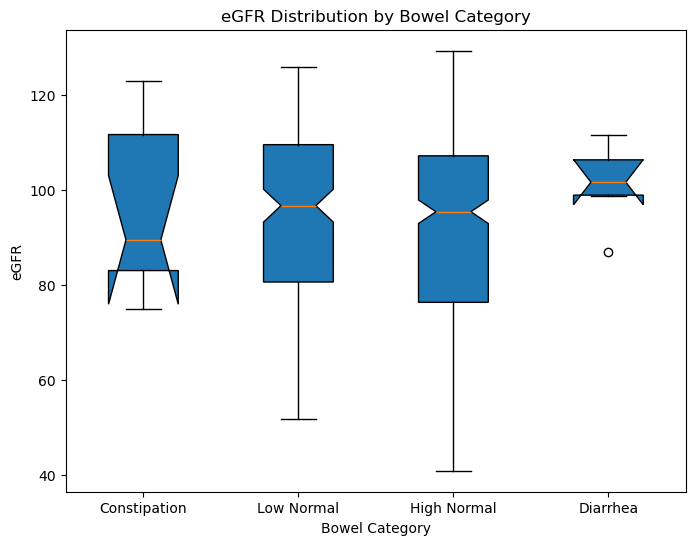

Beta Coefficients: [-3.99017027 -2.68975767  1.70762005  2.20733063 -0.44205471  0.36766299
 -1.98269624 -9.68591973  0.05272792]
Intercept: 115.07551897460424
                            OLS Regression Results                            
Dep. Variable:                   eGFR   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     5.547
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           2.42e-07
Time:                        16:29:26   Log-Likelihood:                -2465.4
No. Observations:                 572   AIC:                             4951.
Df Residuals:                     562   BIC:                             4994.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err       

,public_client_id,bowel,eGFR,p-cresol sulfate,X - 23997,phenylacetylglutamine,X - 11850,p-cresol glucuronide,X - 12216,3-indoxyl sulfate,X - 11843,X - 21310,assessment:diet:freq_meat:int,assessment:diet:freq_processed_meat:int,assessment:lifestyle:cruciferous_vegetables:enum,assessment:diet:freq_cruciferous_vegetables:int,assessment:lifestyle:vegetables:enum,assessment:diet:freq_raw_vegetables_salad:int,assessment:diet:freq_cooked_green_vegetables:int,assessment:diet:freq_cooked_root_vegetables:int
0,01001621,2,69.439409,1.111166,1.185607,1.102880,0.995524,1.110563,0.379110,1.070360,1.041313,0.728898,NaN,NaN,(1) 3-4 times per week,NaN,(2) 2-3,NaN,NaN,NaN
1,01003555,2,63.708606,0.992500,0.997160,0.789559,1.218001,0.854464,1.190192,1.299289,0.540197,1.205904,NaN,NaN,(4) Less than once per month,NaN,(0) Zero/less than 1 per day,NaN,NaN,NaN
2,01004596,2,87.992715,0.654857,0.589141,0.583984,1.312403,0.577590,0.346376,0.940816,1.041313,1.012712,NaN,NaN,(2) Once per week,NaN,(1) 1,NaN,NaN,NaN
3,01004760,3,78.383263,3.073953,2.685353,2.921561,6.334253,6.510212,1.981912,1.881202,6.318236,1.075741,NaN,NaN,(2) Once per week,NaN,(1) 1,NaN,NaN,NaN
4,01006225,1,104.441885,2.316356,2.241564,2.479772,5.072815,3.509053,1.133372,2.301456,5.741292,1.616026,NaN,NaN,(0) Daily,NaN,(2) 2-3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,01994088,3,113.356328,0.462328,0.399505,0.988038,0.070386,0.173705,0.231107,0.365119,0.463798,0.487081,NaN,NaN,(1) 3-4 times per week,NaN,(2) 2-3,NaN,NaN,NaN
568,01994483,3,72.512143,1.045358,1.029528,1.299399,28.405778,0.667584,1.749237,1.667581,13.992051,1.219472,NaN,NaN,(2) Once per week,NaN,(2) 2-3,NaN,NaN,NaN
569,01995109,2,116.842682,0.995377,0.995575,0.231070,0.751995,0.986584,0.248118,0.641178,0.479697,0.699227,NaN,NaN,(1) 3-4 times per week,NaN,(3) 4-5,NaN,NaN,NaN
570,01998999,3,100.993545,0.393642,0.564292,0.302101,0.053313,0.246140,0.250328,0.375171,1.041313,0.496691,NaN,NaN,(1) 3-4 times per week,NaN,(2) 2-3,NaN,NaN,NaN


In [12]:
# begin preparing dataframes for analysis
merged_df = pd.merge(left=eGFR.drop(columns=['days_in_program']), right=rawmet.drop(columns=['days_in_program']),
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
merged_df = pd.merge(left=bowel.drop(columns=['days_in_program']), right=merged_df,
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])

# Select relevant columns for regression
df_reg = merged_df.dropna() # Drop rows with missing values

print("The amount of unique N in this analysis are N = ",len(df_reg.reset_index().public_client_id.unique()))

print("The min and max and median and mean of eGFR - Constipation are:", min(df_reg.eGFR[df_reg.bowel == 1]), max(df_reg.eGFR[df_reg.bowel == 1]), df_reg.eGFR[df_reg.bowel == 1].median(),  df_reg.eGFR[df_reg.bowel == 1].mean())

print("The min and max and median and mean of eGFR - Low Normal are:", min(df_reg.eGFR[df_reg.bowel == 2]), max(df_reg.eGFR[df_reg.bowel == 2]), df_reg.eGFR[df_reg.bowel == 2].median(),  df_reg.eGFR[df_reg.bowel == 2].mean())

print("The min and max and median and mean of eGFR - High Normal are:", min(df_reg.eGFR[df_reg.bowel == 3]), max(df_reg.eGFR[df_reg.bowel == 3]), df_reg.eGFR[df_reg.bowel == 3].median(),  df_reg.eGFR[df_reg.bowel == 3].mean())

print("The min and max and median and mean of eGFR - Diarrhea are:", min(df_reg.eGFR[df_reg.bowel == 4]), max(df_reg.eGFR[df_reg.bowel == 4]), df_reg.eGFR[df_reg.bowel == 4].median(), df_reg.eGFR[df_reg.bowel == 4].mean())

# Create the boxplot]
df = df_reg
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['bowel'] == 1]['eGFR'], df[df['bowel'] == 2]['eGFR'], df[df['bowel'] == 3]['eGFR'], df[df['bowel'] == 4]['eGFR']],
            labels=['Constipation', 'Low Normal', "High Normal", "Diarrhea"],
            notch=True, vert=True, patch_artist=True)
plt.xlabel('Bowel Category')
plt.ylabel('eGFR')
plt.title('eGFR Distribution by Bowel Category')
plt.show()
df_reg

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Select desired columns
df_reg_slice = df_reg.set_index('public_client_id')
selected_columns = df_reg.columns[1:11].tolist()
df_reg_slice = df_reg[selected_columns]

X = df_reg_slice.drop(columns=['eGFR'])

# Calculate min and max values
min_eGFR = df_reg_slice['eGFR'].min()
max_eGFR = df_reg_slice['eGFR'].max()

from scipy.stats import rankdata

# Apply rankdata with method=‘ordinal’ to keep original order
ranks = rankdata(df_reg_slice['eGFR'], method='ordinal')

# Add ranks as a new column in DataFrame

y = df_reg_slice['eGFR']
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the model coefficients
print("Beta Coefficients:", model.coef_)

# Print the intercept
print("Intercept:", model.intercept_)

import statsmodels.api as sm

# Fit the model using statsmodels
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the summary table containing raw p-values
print(model.summary())

from statsmodels.stats.multitest import multipletests

# Extract p-values from the model summary
p_values = model.pvalues

# Adjust p-values using FDR correction
fdr_results = multipletests(p_values, method="fdr_bh")

# Get the overall p-value from the F-statistic
p_value = model.f_pvalue
betas = model.params

# Get the R-squared value
r_squared = model.rsquared

print("Overall p-value:", p_value)
print("R-squared:", r_squared)
print("Betas:")
print(betas)

# Print the adjusted p-values
print("p-values:")
print(p_values)

df_reg = pd.merge(df_reg, meat, on = ['public_client_id'])
df_reg = pd.merge(df_reg, veg, on = ['public_client_id'])

df_reg.to_csv('mediation.csv')

df_reg